## Demo: Identify activity from 'Rev Devs' on the Superchain

Getting started with pyoso guide is available [here](https://docs.opensource.observer/docs/get-started/python).

In [1]:
#! pip install pyoso

In [2]:
from dotenv import load_dotenv
import os
import pandas as pd
from pyoso import Client

load_dotenv()
OSO_API_KEY = os.environ['OSO_API_KEY']
client = Client(api_key=OSO_API_KEY)

In [3]:
def stringify(arr):
    return "'" + "','".join(arr) + "'"

## Get all the deployers we are interested in

In [4]:
DEPLOYERS = [
    '0x84fb5b7a35cb08a5c8a14d8aac537436027d6c5b',
    '0x74340034c8cd9a6c625b658624ae7faad7c0a92a',
    '0x00063ddb30be7bc2292583d5f143e9d6e6228440',
    '0x24e87bd5850ff8e83b6ba1ab247ee97cd6caf0aa',
    '0x63f04cb3bb9e0bd75ad04ef3a50bcb417e49b04a',
    '0xaf7fc773b91230d9f9e4d9ecbc32b67f011063cb',
    '0x45d998a1b39af275a24f3cba75cdb65fe6166e24',
    '0x2edbc2fea6b6a4005124b425fe59daea228d6505',
    '0xfc10a71b1e7974401d840fd15cebf08ed7e115cc',
    '0x661ea32f349f857075cae289e7f6222c2ad083b9',
    '0xad511d11922663a6cbd334045f5f760ae48950f1',
    '0xc009ec1de31478d24f01df3f41e437aab96445b6',
    '0x1d86c2f5cc7fbec35fedbd3293b5004a841ea3f0',
    '0xadf5e4aaced3dd779e8de7b18d1c6a7bc79b597f',
    '0xe30acddc6782d82c0cbe00349c27cb4e78c51510',
    '0x6a73e689720455a8aeff847eeab1eb4027e5bc92',
    '0x49a177c521b8b0710330392b862293716e2237b9',
    '0x81687d1cc42355572ef923f93dca88a50e7337f3',
    '0x686129b664a59b35ed1f070257f9ea8894196b69',
    '0x981808b4a50f7f33b81fa166aaec1bcd90c61a88',
    '0xfd560d83faf498968d50999f7a2d5f17d3066007',
    '0x6ff5723435b7dfc2371b57fb5cb4c373e5995c78',
    '0x00409fc839a2ec2e6d12305423d37cd011279c09',
    '0xaf84ef7548dc8c0f37fdfd280206c64c401c9c44',
    '0x5682a4ebdae6b5cea7bbf0f636fb7161f837115c',
    '0xaef766ce8047a11cbb0f8264dea7559fd0b48444',
    '0xfbe4b8a45b43c314a3bf28fd6848d4698ffe2a85',
    '0xf01dd015bc442d872275a79b9cae84a6ff9b2a27',
    '0xc841d6ddf66467af551b35218c0c2e22f9c14b48',
    '0xefbc53e0afdc9f649bc1ab692461df57e70a560f',
    '0x3cd5fec7fa9827cf0d262d6be5421a61cf615794',
    '0x0374f0273e01841f594a4c0becdf7bfbd9b13a42',
    '0xecd02810db92ff027ea1b0850d46bda963676d74',
    '0xad4f365a550835d40dc2e95fdffa1e4edd3fbe14',
    '0xa3df90bf8e8183a74b537b27e3955ba7d8de199c',
    '0x3206cc663303bcec8604242a6c955c9df9c95a79',
    '0x666936a007c8c2e70dd5aae9151fd50de858fb16',
    '0xc3e8ac233f02d13c1e299e47ae230c205e0177ed',
    '0xb00cc766b7adc1a34d72ea46a8d4bbdfbc5904f9',
    '0x770d6dc750d50c6a1e237f9a6f0fa75acf7546ac',
    '0x94db037207f6fb697dbd33524aadffd108819dc8',
    '0x5530f89d5ee7907e467262f6f4df2242ba626233',
    '0x2c5b698e8225f54db7c7ed1a77346883f8d6dc0b',
    '0xfad355b31d213078b8557c0814c1f33a4c6859f2',
    '0x4560c657518cbb1998fb85658d6abd12cc4eab53',
    '0x9aa95353eb75d27a974d696c58b88e1ed3bfeebb',
    '0xeaa823ab4c4ee00283d8ed7be713ddf8a5ba0fac',
    '0x0000007b168966dbd0a9e7c05c69ebcb4c318c9a',
    '0xe46e46bc205df560874c18f2430c18a604253120',
    '0xe908c2d5613d24d49e376f19715c795db8e04f81',
    '0x9111c47492a9043d12af0e6c46d57560eebcd9d4',
    '0x922b7ab709dc386f620285221ec4b59e91523ffd',
    '0x00cdebc042c87c95e439e1aefa0bd3a8014da577',
    '0xcc42e700ae461bdf5b560e781110a965a8d43935',
    '0x0000000000009fc4a621a45e14ed7388630e637a',
    '0x2263c638f36e445ac6871b0b0d903644f34ab540',
    '0xc4fc57dedd2463314a3fd2dbadb86b4404c257e5',
    '0x0a199efed9c1c922959eae32aed923e4168f594a',
    '0xd0615037bbe05e45b75f26858d9cba76e4d969b2',
    '0x1e983ce401336a8a74bc2983ae681c901117ae10',
    '0x9b7fcf83fa5531ab18545e83b511692734aa1764',
    '0x4cbee7ad42d33e9d3b41e8b6faca2f6f173c8a94',
    '0xb653b899082be4154fbf181e1caac8bb5b775282',
    '0xf4cc8a6a89cefdbdb515eab3ac7d76c7f32bd61b',
    '0xd002e731b302286009abaafd5e05a9853f5f3002',
    '0x96e03e38ad4b5ef728f4c5f305eddbb509b652d0',
    '0x2d815240a61731c75fa01b2793e1d3ed09f289d0',
    '0x89c1918584a0c847cf851f2acdd3650be3816853',
    '0x452a510e8119ad0e1dc41fbc57a0955d6ed58c77',
    '0x1fe04f7c964f1e111887db4ca281475243149d88',
    '0x82c0541c89375f3931cc58e9b4c2c097e6409061',
    '0x4c9cd28e8e0b776ea112cdd588fe982b3be9ca2e',
    '0xd05eca82d8573b885e4bcc4fcf677e02324e6835',
    '0x5f008112d9ce1ea6068ec32874d381db012511f6',
    '0xfcd50840fa8e1694558cf6f38dcb60f1cae5d64f',
    '0x474c2c26a05d9f7e517f76af2fff371e6eb07585',
    '0x62398788692aded44638f8b9f3ee4b977c78ff46',
    '0x20ae1f29849e8392bd83c3bcbd6bd5301a6656f8',
    '0xa55de842dd45ddf55c8c3d42176847f9f9e8da92',
    '0xa4846e5729bf303d6918ae584a77deba7db4ef60',
    '0xf39068ecef6bb1c081b062f4b74d4e28b6b5c4fa',
    '0x220371bfda04c0cd8482c80e01cd7de6d1945b82',
    '0x032857d37ed74242b3faa9e8572965771230e0e5',
    '0xbcec8fc952776f4f83829837881092596c29a666',
    '0x8474b7a7a2238e3fa9705482417a059bd6abe2c1',
    '0xa73b5f18f12599ff3aaf5c9e3cbb78aa857e3d18',
    '0xc4f6a6836dd42707629b0113ece8413680d77e31',
    '0x9a7801447d4b06ab025ca7f3475035bc02906310',
    '0xd7b6c587be6934d398cb08967807b44b090f1028',
    '0x02ff541f434cd611f1e5da22dc234cb3ff2d5e6e',
    '0x76bae01fba505e37f53e081b700b8c625763e370',
    '0x3773ade56662f1ee072344a3e85072b9688ed1cc',
    '0x9a41d0b6e046f2cb7dba788ac28dfbdc0fa6c292',
    '0x2145ac607a1b97d28be117d06474b003dec986b4',
    '0xf6e9b8d1877ea00f7b72f682fa15906d6a9f4693',
    '0xc73e3f4715b8a3253c345bcfb22758df123fa235',
    '0xdc863f2e217b05575ea812178bdc5ed96b4555ae',
    '0x0eba660f4ca0a7fa6dc642b65f99ae95ea5257b7',
    '0xd6099df2a9c581ddabab4a1a7272d131e93968ca',
    '0xfb847bc2159a60dff3cf40aad7526076865c420d',
    '0x17320e6e3904206703b4ee4617aabe61402988f4',
    '0x0b35417618ab721cf126f3614de01f56a0215fb8',
    '0xc11c6f47fe090a706ba82964b8a98f1682b244ff',
    '0x80056e1b3f1e4b3e103f8ee7555b770af768e606',
    '0x2ecfb641fbe61217bd335849433ba0fa701285c4',
    '0x8e9c63db207a1e7d0a6e65626740621e62cd591b',
    '0xbbca09216d5acd45f98f3e15c0556b19ea83f5da',
    '0x597dc4159a4b85c086c3c679a0b6c8fe2836886f',
    '0x296d6e13ba695897343fe46c51215c3c372ef172',
    '0x651d8c28bac10b22ba1dc8a63054de7076c64f35',
    '0x628f6789febba58a88966a44c5099a5b4a4ee65c',
    '0x350220b767d5764cbe43648d3cae77fbc8b26261',
    '0xe1ba7479ed38bf73b9c8c543959c78ca6edc97fe',
    '0xfe1989d66cc87180cd9b441c198b8554773f58bc',
    '0x97a8ddd473320f37b425cb64cbd9a7170671b05b',
    '0x91b6a5c5adb86a1654829a492512a4d8304ce591',
    '0xebef2cefc1f9484cd959642b568f4ac6a20cea16',
    '0xd754a613c08ca611af1408fbed1fb793af733b07',
    '0x2c91b9726d5ec28655a7a4d06e26827f2358a522',
    '0xe9118edd306092d3f44acbc82b1e0fa29dfe45a3',
    '0x754cd99d3abae73a742129917d54d23750b92e30',
    '0xfb53cc84f5187c2f386e9895476b3decf33d4982',
    '0x02ad0f9cab40def1d6563bfc84f5aea4282842af',
    '0xfd08836eee6242092a9c869237a8d122275b024a',
    '0xcf831e498dd1a99c86a23cff2b648eac42d3df7f',
    '0x1a5981545d558ff8a70e6c17a13e7d8838909e77',
    '0xf2a5543107264f63c4c73481ee568d49e7b537aa',
    '0xc1fc90b93c150a7bb81960b97ee4bbd8d2205f29',
    '0x7b18a4e2e08d4b3898b32ffd10925bb2fc511b40',
    '0x52cc50a026aba4c4221e21fe3fb9b047d968305c',
    '0xdaa2c2641629b0d1fc9bd272923f55caab6a788e',
    '0x12f72cfd58de931834cbd39177037e75ac890d85',
    '0x15b389fec3039228cbd7f0c8fd250025971e3e63',
    '0x7122fad1073d4dbb56987a1b6e9bbf859a8d0089',
    '0xd8db158ab9ea2b7fd4b7c7efbcc93438b5aae113',
    '0x6cc07db77401ef0df9c79f99a9733bdf2e0a5362',
    '0x6f08d8de47066801813d62b9ec543016cfca595f',
    '0x9260104cd58cc9f5b2cf1373848c7e7889e66fbd',
    '0xf384a640de8520a5203eaa0d1c75ff4bb41e7acb',
    '0xada1682be2aaccc8967896bd7c61705ab513ec59',
    '0xe7c19566cbde11f1d1a4b2b47c0c283bf9bea086',
    '0x521337f830123fc1f8f0508275f499346f768ba7',
    '0x1fd2a56907b1db9b29c2d8f0037b6d4e104f5711',
    '0xd2200ad6e4e46d045004759c5ba8bc2e39f71933',
    '0xf47027f3edcb1f0b6861a25e6f3738e398440e11',
    '0x1be9bfd50073d3694a8ba07abb3ce0c3d96cc91f',
    '0x1691565c9e5846b348bf21707521e492614df376',
    '0x74dd7d7d4c9008fe99060fed7735dfb296b1f020',
    '0x62bc6a92f4a4d0f5b4e16967b88db2d9e196c9f9',
    '0x4a6370dc13a9a5e63bd4edaa15bbfbf3438f82a5',
    '0x502f835867e6b6a2d2343408c4cd01acc564f30f',
    '0x4c735538fff14605a9eccc1c31136542a3d3e73a',
    '0x9830d6b37fe7488707cc4ad7f8b481d75eb2a8c2',
    '0xe65f4d1a1ae61e7263345355526a4a9c1cfbebc2',
    '0xbf578c63e14992effc0bbd2179e799a18cbbfe91',
    '0x7f1acf50ae264660d23df3478c1953e8906bbef7',
    '0xbfd2745685891d4396dc2edb8fceb9be8f5cf8f5',
    '0x98b78c6887350c7b71ff425ab6a276e8ee478fc4',
    '0xe25f3be026fb8c20b21bc25d05f95369495eb8b3',
    '0x32ad19e35d852358b02e09a293b4d6b1daed24c8',
    '0x5d69c42a3a481d0ccfd88cfa8a2a08e2bf456134',
    '0x83bbe9cfcc205bb8e53cba0b51d6db9386ce58b5',
    '0xf1d87a5da43676393ca4c621435f612a874f6257',
    '0x8e7ce0dfe69e0251e8dd4c3515989e287a077daf',
    '0x08c3806c2209e528afa54fc9213a8fc9528b96d8',
    '0xfd770fa6212926783c6f2d54346d43936b413ce1',
    '0x63781a09be6082117bbe9684919ba40a4421fef6',
    '0x1d2db209519c540d57314b1692538eebc1b26713',
    '0x54117957eab5070d27785696cd24c38f5b35a913',
    '0x47c539be39c29d6124e95da781efdfd075c2fb37',
    '0x628d436867c08e04adc303899faab042b6ddc8c0',
    '0x66ae89f40599c5269930f395757d43bc688bf506',
    '0xb47954845483d210fe62c4fb97edd0e08365a96a',
    '0xb3de3b6ac5f8e7b41b834c1509fdd0e56887c9b0',
    '0xb342cad05655cee7c8c50124504c7c989a50907a',
    '0x07895b9b1a6f1b9610813ba28189c1e403680b59',
    '0xa44c7d36431f0af650d22ea02649f71e33af20b7',
    '0xa58abee3409cef64a9d4b368c1246ec4956df19d',
    '0xa12d3ddc74044471d826803395ff2b4b6d80eb72',
    '0xfb0f0c37a3452c6a4a2a7d45d453a391b305fe5a',
    '0xe9d0313c5ab92a6113514dc9e5e891936ba3da1d',
    '0x0563d0bab7750f51ec0c70c8299a894721885774'
]

DEPLOYERS = [x.lower() for x in DEPLOYERS]

## Explore some data

In [5]:
# See which deployers have been active on which chain

df_deployments = client.to_pandas(f"""
    SELECT *
    FROM contracts_v0
    WHERE
        root_deployer_address IN ({stringify(DEPLOYERS)})
        OR originating_address IN ({stringify(DEPLOYERS)})
""")

df_deployments.tail()

,deployment_date,contract_address,contract_namespace,originating_address,factory_address,root_deployer_address,sort_weight
11999,2025-01-11,0x21c35ec81e57e686dc0531f308c09fe5829d3977,INK,0xe4a88aeeb36169899b2334d98d04297ac51f2a20,0x76f948e5f13b9a84a81e5681df8682bbf524805e,0xb3de3b6ac5f8e7b41b834c1509fdd0e56887c9b0,4
12000,2025-03-27,0xc9f3aab7e683242a6877de8f7d6989008a321afb,WORLDCHAIN,0x28cc9fe4c209760124b77af14ff59a0ccc0e1f0a,0x3140167e09d3cfb67b151c25d54fa356f644712d,0xe7c19566cbde11f1d1a4b2b47c0c283bf9bea086,51
12001,2024-12-21,0x4d59fed30956ae18572a055286790b73e95828d7,BASE,0xa3df90bf8e8183a74b537b27e3955ba7d8de199c,<NA>,0xa3df90bf8e8183a74b537b27e3955ba7d8de199c,1
12002,2025-01-18,0x07c553d976779142961b3cde5a8e8f1b854b7753,INK,0xec6c0b4ab93fc2115a2747d562a425948f8c0e68,0x76f948e5f13b9a84a81e5681df8682bbf524805e,0xb3de3b6ac5f8e7b41b834c1509fdd0e56887c9b0,4
12003,2025-01-18,0xb6de641eed9125e2cb3587ff97cc0f60b067900c,INK,0xd6424ca422cc83e8210d32cfdcf7e3b457f08989,0x76f948e5f13b9a84a81e5681df8682bbf524805e,0xb3de3b6ac5f8e7b41b834c1509fdd0e56887c9b0,2


In [6]:
df_deployments.groupby('contract_namespace')['root_deployer_address'].nunique().sort_values()

contract_namespace
AUTOMATA        1
RACE            1
POLYNOMIAL      1
ORDERLY         1
METAL           1
SWAN            1
SHAPE           6
WORLDCHAIN      7
SWELL           7
REDSTONE        8
FRAX            9
CYBER          10
MINT           12
LISK           15
BOB            17
MODE           25
UNICHAIN       27
ZORA           30
INK            45
SONEIUM        50
OPTIMISM       75
BASE          107
Name: root_deployer_address, dtype: int64

In [7]:
# See which deployers' contracts have led to the most activity on the Superchain in March

df_activity = client.to_pandas(f"""
    SELECT
        c.root_deployer_address,
        c.contract_address,
        c.contract_namespace,
        APPROX_DISTINCT(e.transaction_hash) AS txns
    FROM contracts_v0 AS c
    JOIN int_events__blockchain AS e
        ON c.contract_address = e.to_artifact_name
    WHERE
        c.root_deployer_address IN ({stringify(DEPLOYERS)})
        AND e.time >= DATE '2025-03-01'
        AND e.time < DATE '2025-04-01'
        AND e.event_type = 'CONTRACT_INVOCATION'
    GROUP BY 1,2,3
    ORDER BY 4
""")

df_activity.tail()

,root_deployer_address,contract_address,contract_namespace,txns
113,0x6ff5723435b7dfc2371b57fb5cb4c373e5995c78,0x8e56343adafa62dac9c9a8ac8c742851b0fb8b03,OPTIMISM,93
114,0xa58abee3409cef64a9d4b368c1246ec4956df19d,0x3a61ccca6257d3951ffe81b9ba8294a69e389e95,SONEIUM,96
115,0x1d86c2f5cc7fbec35fedbd3293b5004a841ea3f0,0x00000000557be012f03818bc56b8a85fb71c5777,MODE,298
116,0xf47027f3edcb1f0b6861a25e6f3738e398440e11,0x5dd208326b0b625f2da8b956848c0bf18d3f8278,WORLDCHAIN,2791
117,0xf47027f3edcb1f0b6861a25e6f3738e398440e11,0x90ac15b9fadc4656dce25c8da0d2bce6a16e605c,WORLDCHAIN,3504


<Axes: ylabel='root_deployer_address'>

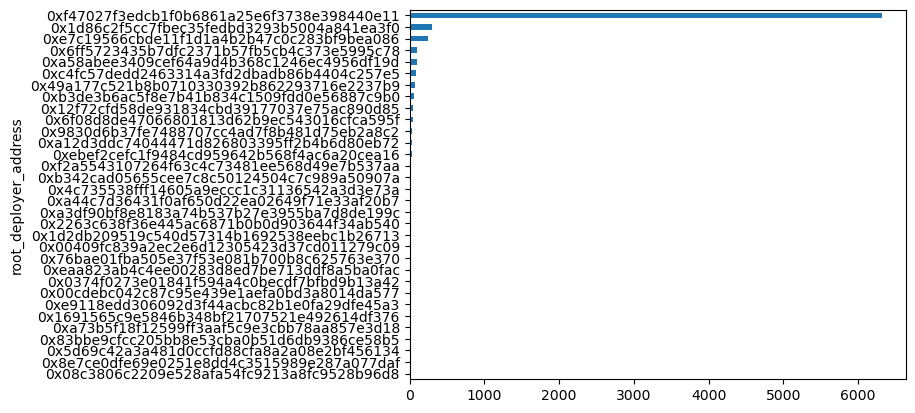

In [8]:
df_activity.groupby('root_deployer_address')['txns'].sum().sort_values().plot(kind='barh')

In [9]:
# See if any owners have applied for Retro Funding

df_artifacts_by_project = client.to_pandas(f"""
    SELECT DISTINCT
        abp.project_name AS op_atlas_id,
        p.display_name AS project_name,
        abp.artifact_name AS deployer_address,
        abp.artifact_source AS chain,
        abp.artifact_id,
        abp.project_id
    FROM artifacts_by_project_v1 AS abp
    JOIN projects_v1 AS p ON abp.project_id = p.project_id
    WHERE
        abp.artifact_name IN ({stringify(DEPLOYERS)})
        AND p.project_source = 'OP_ATLAS'
    ORDER BY project_name
""")

df_artifacts_by_project

,op_atlas_id,project_name,deployer_address,chain,artifact_id,project_id
0,0x33c6a6da4958c551038286a8fc5e05aab6a48f919320...,Airdrop Finder,0xe9118edd306092d3f44acbc82b1e0fa29dfe45a3,OPTIMISM,9xiXeGnG/UPd+hDoJfn8Aw3cs8928U8FSVhiZqA2Weo=,CfWsDNvEGx0lDJquRTng8kiT3nodw5x6XP3d+5UAM4o=
1,0x808b31862cec6dccf3894bb0e76ce4ca298e4c2820e2...,Fractal Visions,0xc4fc57dedd2463314a3fd2dbadb86b4404c257e5,MODE,LvJwNBdElbw78WndGvZmRYzM59g0Qnba1fj7cAiARVs=,x9MZObEzydNAk1HPdRO8azvLIkNL0gAIgOIvKthPIbs=
2,0x808b31862cec6dccf3894bb0e76ce4ca298e4c2820e2...,Fractal Visions,0xc4fc57dedd2463314a3fd2dbadb86b4404c257e5,BASE,3i5Etfze5PeS7CrRgDy3Ea35+AhdbcIGRxvUYVXfPOM=,x9MZObEzydNAk1HPdRO8azvLIkNL0gAIgOIvKthPIbs=
3,0x808b31862cec6dccf3894bb0e76ce4ca298e4c2820e2...,Fractal Visions,0xc4fc57dedd2463314a3fd2dbadb86b4404c257e5,SHAPE,+q3pRT6VSYlrsdMBB7JF0si9Gr+0yKWz6HsLRurskec=,x9MZObEzydNAk1HPdRO8azvLIkNL0gAIgOIvKthPIbs=
4,0x808b31862cec6dccf3894bb0e76ce4ca298e4c2820e2...,Fractal Visions,0xc4fc57dedd2463314a3fd2dbadb86b4404c257e5,OPTIMISM,nVESeOFCH57++rHNB+fhcpjDMLK/V7mW/vBB7qhDOGM=,x9MZObEzydNAk1HPdRO8azvLIkNL0gAIgOIvKthPIbs=
5,0x808b31862cec6dccf3894bb0e76ce4ca298e4c2820e2...,Fractal Visions,0xc4fc57dedd2463314a3fd2dbadb86b4404c257e5,5330,XTIsPMIEvLwTNIT5gLECAnOjVSgZyrwvX0NUjMNU0WI=,x9MZObEzydNAk1HPdRO8azvLIkNL0gAIgOIvKthPIbs=
6,0x2c41bf7b4d36a344881581e20ecb2929d38c3415fffa...,PUF,0xe7c19566cbde11f1d1a4b2b47c0c283bf9bea086,WORLDCHAIN,vVstqY2LuR9hTXSz55Xe4+vQ78FlfCjUvIQzommHdcs=,RxZsvgAlu4U6NJPHoDaURU2dSy/x7ey1UKzAk3pahTE=
7,0x8bfdc42f26bf691d378d2073ae509c46b85c0eed8db8...,Superfluid,0x2d815240a61731c75fa01b2793e1d3ed09f289d0,BASE,sajTEFpkcwbxR/O2Uz7VrR2RGKEtO6MrrMVwgjrdhdU=,1trB/l9QKhGRlHWNxeKxae3DYXIRAKtuzUHXcvpnpN8=
8,0x8bfdc42f26bf691d378d2073ae509c46b85c0eed8db8...,Superfluid,0x2d815240a61731c75fa01b2793e1d3ed09f289d0,OPTIMISM,Mm7Ks2RUzy9Q//upKCb1nA4n9yKfN3J9OQg1aH1qprY=,1trB/l9QKhGRlHWNxeKxae3DYXIRAKtuzUHXcvpnpN8=
